In [1]:
import sys

python_version = sys.version
print(f"Python version: {python_version}")

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [2]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Layer,Dense,Input
import tensorflow as tf

In [4]:
gpu=tf.config.experimental.list_physical_devices('GPU')
for gpus in gpu:
    tf.config.experimental.set_memory_growth(gpus,True)

In [5]:
len(gpu)

0

In [6]:
os.getcwd()

'C:\\Users\\Ckush'

In [7]:
os.chdir("F:/")
os.getcwd()

'F:\\'

In [8]:
pos_path=os.path.join('work','positve')
neg_path=os.path.join('work','negative')
anchor_path=os.path.join('work','anchor')

In [9]:
#building directories
#os.mkdir(pos_path)
#os.mkdir(neg_path)
#os.mkdir(anchor_path)


In [10]:
path="lfw/"

In [11]:
#iterating through the files
for directories in os.listdir(path):
    for filename in os.listdir(os.path.join(path,directories)):
        Ex_path=os.path.join(path,directories,filename)
        #transferrring it to new path
        New_path=os.path.join(neg_path,filename)
        os.replace(Ex_path,New_path)
        

In [12]:
import uuid

In [13]:
#creating unique identity to the files we  have
uuid.uuid1()

UUID('a02a62cc-2b95-11ee-9e7e-30c9abdaff74')

In [14]:
os.path.join(anchor_path,'{}.jpg'.format(uuid.uuid1()))

'work\\anchor\\a02c660a-2b95-11ee-ad3b-30c9abdaff74.jpg'

In [15]:
#import and creatinf postive and anchor images from camera 
import cv2
cap=cv2.VideoCapture(0)
while(cap.isOpened()):
    ret,frame=cap.read()
    #Show the resized frame on the screen
    frame=frame[130:80+300,200:200+250,:]
    if cv2.waitKey(1)&0XFF == ord('a'):
        #creating unique name to the photos clicked
        imgname=os.path.join(anchor_path,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
        
    #Collect positives
    if cv2.waitKey(1) &0XFF==ord('p'):
        imgname=os.path.join(pos_path,'{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname,frame)
    
    cv2.imshow('Image Collection',frame)
    
               
      # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam
cap.release()

# Close the displayed frames
cv2.destroyAllWindows()

In [16]:
frame

array([[[157, 156, 157],
        [157, 156, 157],
        [157, 156, 157],
        ...,
        [161, 159, 160],
        [161, 159, 160],
        [161, 159, 160]],

       [[155, 155, 156],
        [155, 155, 156],
        [157, 156, 157],
        ...,
        [161, 159, 160],
        [159, 158, 159],
        [161, 159, 160]],

       [[153, 154, 155],
        [154, 155, 156],
        [156, 156, 157],
        ...,
        [161, 159, 160],
        [159, 158, 159],
        [159, 158, 159]],

       ...,

       [[186, 194, 204],
        [186, 195, 205],
        [185, 196, 205],
        ...,
        [177, 189, 204],
        [182, 191, 205],
        [187, 196, 209]],

       [[185, 193, 204],
        [185, 194, 204],
        [185, 196, 205],
        ...,
        [161, 176, 191],
        [179, 191, 205],
        [184, 195, 208]],

       [[187, 194, 205],
        [185, 194, 204],
        [183, 193, 203],
        ...,
        [166, 182, 197],
        [173, 188, 202],
        [181, 194, 207]]

In [17]:
frame.shape

(250, 250, 3)

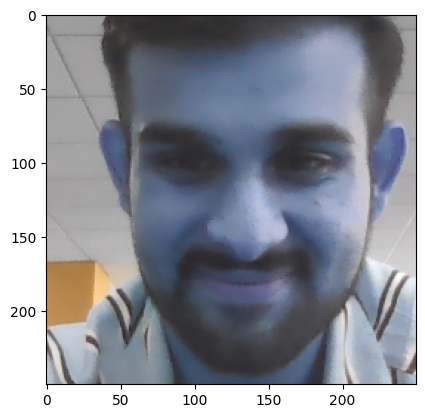

In [18]:
plt.imshow(frame)

In [19]:
anchor=tf.data.Dataset.list_files(anchor_path+'\*.jpg').take(300)
positive=tf.data.Dataset.list_files(pos_path+'\*.jpg').take(300)
negative=tf.data.Dataset.list_files(neg_path+'\*.jpg').take(300)

In [20]:
dir_test=anchor.as_numpy_iterator()
dir_test.next()

b'work\\anchor\\bf507cd7-1e72-11ee-973f-30c9abdaff74.jpg'

In [21]:
def preprocess(file_path):
    byte_img=tf.io.read_file(file_path)
    img=tf.io.decode_jpeg(byte_img)
    img=tf.image.resize(img,(100,100))
    img=img/255.0
    return img

In [22]:
img=preprocess('work\\anchor\\0082cdba-1e73-11ee-a3f7-30c9abdaff74.jpg')
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.73259807, 0.73651963, 0.7129902 ],
        [0.74215686, 0.74607843, 0.7264706 ],
        [0.7377451 , 0.74313724, 0.7144608 ],
        ...,
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.7362745 , 0.7362745 , 0.6965686 ],
        [0.7411765 , 0.7382353 , 0.71568626],
        [0.74289215, 0.7473039 , 0.7078431 ],
        ...,
        [1.        , 1.        , 0.9980392 ],
        [1.        , 1.        , 0.9980392 ],
        [1.        , 1.        , 0.9980392 ]],

       [[0.73259807, 0.7384804 , 0.6884804 ],
        [0.7360294 , 0.7382353 , 0.70686275],
        [0.73995095, 0.73995095, 0.7026961 ],
        ...,
        [0.9970588 , 0.9970588 , 0.99509805],
        [0.9970588 , 0.9970588 , 0.99509805],
        [1.        , 1.        , 0.9980392 ]],

       ...,

       [[0.45588234, 0.4509804 , 0.5058824 ],
        [0.44

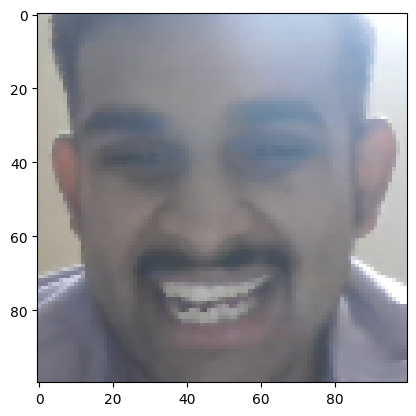

In [23]:
plt.imshow(img)

In [24]:
img.numpy().max()

1.0

In [25]:
positives=tf.data.Dataset.zip(anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor))))
negatives=tf.data.Dataset.zip(anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))))
Data=positives.concatenate(negatives)
print(Data)

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [26]:
samples=Data.as_numpy_iterator()
example=samples.next()
example

(b'work\\anchor\\a4bcf999-1e72-11ee-8537-30c9abdaff74.jpg',
 b'work\\positve\\09a66f0c-1e73-11ee-a4bf-30c9abdaff74.jpg',
 1.0)

In [27]:
#Now we are going to Build Train and Test Partition
def preprocess_twin(img,validation_img,label):
    return(preprocess(img),preprocess(validation_img),label)

In [28]:
res=preprocess_twin(*example)

In [29]:
res[0]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.6968137 , 0.7129902 , 0.68308824],
        [0.6129902 , 0.63186276, 0.64362746],
        [0.5269608 , 0.5529412 , 0.6098039 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.5448529 , 0.5772059 , 0.5948529 ],
        [0.49068627, 0.5259804 , 0.5683824 ],
        [0.49460784, 0.5230392 , 0.5953431 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.46078432, 0.5058824 , 0.5632353 ],
        [0.4644608 , 0.49656862, 0.56960785],
        [0.4732843 , 0.50465685, 0.5806373 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.46960783, 0.46568626, 0.52843136],
        [0.46

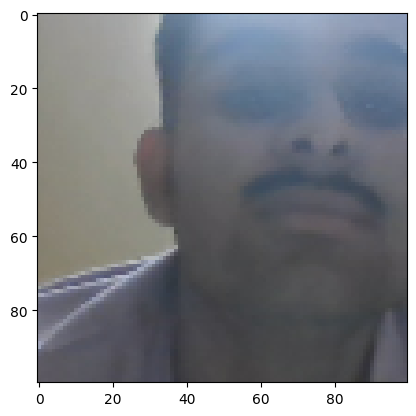

In [30]:
plt.imshow(res[1])

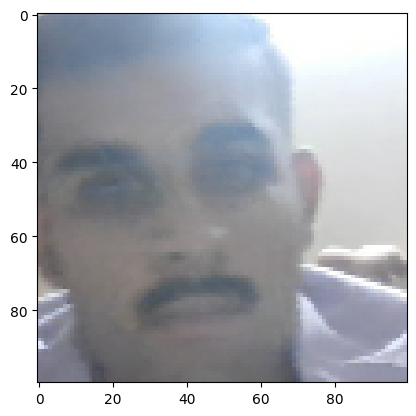

In [31]:
plt.imshow(res[0])

In [32]:
#building a dataloader pipeline
Data=Data.map(preprocess_twin)
Data=Data.cache()
Data=Data.shuffle(buffer_size=1024)

In [33]:
#train_data
train_data=Data.take(round(len(Data)*.7))
train_data=train_data.batch(16)
train_data=train_data.prefetch(8)

In [34]:
train_data


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [35]:
Data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [36]:
#testing_data
test_data=Data.skip(round(len(Data)*.7))
test_data=test_data.take(round(len(Data)*.3))
test_data=train_data.batch(16)
test_data=train_data.prefetch(8)

In [37]:
test_data


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

# Model Building


## Building Embedding layer


In [38]:
def make_embedding():
    #creating input layer
    inp=Input(shape=(100,100,3),name="Input_Image")
    
    #Convulation Layer with RelU to first block
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    #implementing maxPooling layer
    m1=MaxPooling2D(64,(2,2),padding='same')(c1)
    
    #implementing next block
    c2=Conv2D(128,(7,7),activation='relu')(m1)
    #implementing maxPooling layer
    m2=MaxPooling2D(64,(2,2),padding='same')(c2)
    
     #implementing third block
    c3=Conv2D(128,(4,4),activation='relu')(m2)
    #implementing maxPooling layer
    m3=MaxPooling2D(64,(2,2),padding='same')(c3)
    
     #implementing Final Layer
    c4=Conv2D(256,(4,4),activation='relu')(m3)
    f1=Flatten()(c4)
    d1=Dense(4096,activation='sigmoid')(f1)
    
    return Model(inputs=[inp],outputs=[d1],name='embedding')

In [39]:
inp=Input(shape=(100,100,3),name="Input_Image")
c1=Conv2D(64,(10,10),activation='relu')(inp)
m1=MaxPooling2D(64,(2,2),padding='same')(c1)
c2=Conv2D(128,(7,7),activation='relu')(m1)
m2=MaxPooling2D(64,(2,2),padding='same')(c2)
c3=Conv2D(128,(4,4),activation='relu')(m2)
m3=MaxPooling2D(64,(2,2),padding='same')(c3)
c4=Conv2D(256,(4,4),activation='relu')(m3)
f1=Flatten()(c4)
d1=Dense(4096,activation='sigmoid')(f1)
f1
embedding=Model(inputs=[inp],outputs=[d1],name='embedding')
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

## Build L1 Distance Layer

In [40]:
#this layer will take the feature layer of 4096 vector of the input layer and
#then subtracts the array flatten layer with other image for checking the similarity between the images.


In [41]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super(L1Dist,self).__init__()
    def call(self,input_embedding,validation_embedding):
        return tf.abs(input_embedding-validation_embedding)

## Make Siamese Model

In [42]:
def make_siamese_model():
    # for Inputs
    input_img = Input(name='input_img', shape=(100, 100, 3))
    validation_img = Input(name='validation_img', shape=(100, 100, 3))

    # combining these two images
    siamese_layer = L1Dist(name="Distance")
    distances = siamese_layer(embedding(input_img),embedding(validation_img))

    # Classification Layer
    classifier = Dense(1, activation='sigmoid')(distances)
    return Model(inputs=[input_img, validation_img], outputs=classifier, name="Siamese_Network")


In [43]:
input_img=Input(name='input_img',shape=(100,100,3))
validation_img=Input(name='validation_img',shape=(100,100,3))
siamese_layer=L1Dist(name="Distance")
distances=siamese_layer(embedding(input_img),embedding(validation_img))    
classifier=Dense(1,activation='sigmoid')(distances)
our_model=Model(inputs=[input_img,validation_img],outputs=classifier,name="Siamese Network")

In [44]:
our_model.summary()

Model: "Siamese Network"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                    

In [45]:
siamese_model=make_siamese_model()
siamese_model.summary()

Model: "Siamese_Network"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                    

# Training


## Loss and Optmizier

In [46]:
binary_loss_optimzer=tf.losses.BinaryCrossentropy()
opt=tf.keras.optimizers.Adam(1e-4)

In [47]:
checkpoint_dir="./training_Checkpoints"
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

## Build Train Step Function

In [48]:
train_batch=train_data.as_numpy_iterator()
batch_1=train_batch.next()
#len(batch_1[1])

#bat=tf.convert_to_tensor(batch_1[1])
#bat

In [49]:
y=batch_1[2]
y.shape

(16,)

In [50]:
X=batch_1[:2]
X

(array([[[[0.7286765 , 0.73259807, 0.7129902 ],
          [0.735049  , 0.7389706 , 0.71936274],
          [0.7382353 , 0.74215686, 0.722549  ],
          ...,
          [0.9046569 , 0.93014705, 0.95367646],
          [0.90294117, 0.922549  , 0.9460784 ],
          [0.90294117, 0.9147059 , 0.94215685]],
 
         [[0.7254902 , 0.7294118 , 0.70980394],
          [0.73014706, 0.73406863, 0.7144608 ],
          [0.73308825, 0.7370098 , 0.717402  ],
          ...,
          [0.8982843 , 0.9223039 , 0.9458333 ],
          [0.8990196 , 0.91862744, 0.94215685],
          [0.89509803, 0.90686274, 0.9343137 ]],
 
         [[0.72083336, 0.7247549 , 0.7051471 ],
          [0.7235294 , 0.72745097, 0.7078431 ],
          [0.7294118 , 0.73333335, 0.7137255 ],
          ...,
          [0.89436275, 0.9139706 , 0.9375    ],
          [0.89215684, 0.9117647 , 0.9352941 ],
          [0.89215684, 0.9098039 , 0.9343137 ]],
 
         ...,
 
         [[0.4745098 , 0.47254902, 0.51862746],
          [0.45931

In [51]:
X=batch_1[:2]
#X.shape
np.array(X).shape

(2, 16, 100, 100, 3)

In [52]:
@tf.function
def train_step(batch): ##passes one batch of data
    #record all of our operations
    with tf.GradientTape() as tape:
        #Get achor and positive/negative image
        X=batch[:2]
        #Get label
        Y=batch[2]
        #forward pass
        yhat=siamese_model(X,training=True)
        logits = tf.squeeze(yhat, axis=-1)
        #calculate Loss
        print(logits.shape)
        loss= tf.keras.losses.binary_crossentropy(Y,logits)
        
    #Calculate updated weights and apply to siamese model
    grad= tape.gradient(loss,siamese_model.trainable_variables)
    #Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad,siamese_model.trainable_variables))
    return loss
    
    pass

## Build Training Loop

In [53]:
def train(data,epochs):
    #loop through epochs
    for epoch in range(1,epochs+1):
        print('\n Epoch {}:{}'.format(epoch,epochs))
        progbar=tf.keras.utils.Progbar(len(data))
        
        #loop through each batch
        for idx,batch in enumerate( data):
            #Run train stepo her
            train_step(batch)
            progbar.update(idx+1)
        #Save checkpoints
        if epoch %10==0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            
    

## Train the Model

In [68]:
epochs=100

In [70]:
train(train_data,epochs)

# Evaluate Model

In [71]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 1s 839ms/step


array([[0.4690875 ],
       [0.05687214],
       [0.05987851],
       [0.03940392],
       [0.49351072],
       [0.26338091],
       [0.42561528],
       [0.0525465 ],
       [0.48153907],
       [0.05619642],
       [0.47445145],
       [0.49812272],
       [0.05244404],
       [0.51526916],
       [0.49162647],
       [0.49142352]], dtype=float32)

In [72]:
# Post processing the results 
[1 if prediction > 0.6 else 0 for prediction in y_hat ]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
y_true

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.],
      dtype=float32)

# Calculate Metrics

In [74]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

0.11111111

In [75]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

Images are efficiently trained and evaluated using an array of y_hat and y_true. The model accurately identifies whether the images are the same (1) or different (0). 

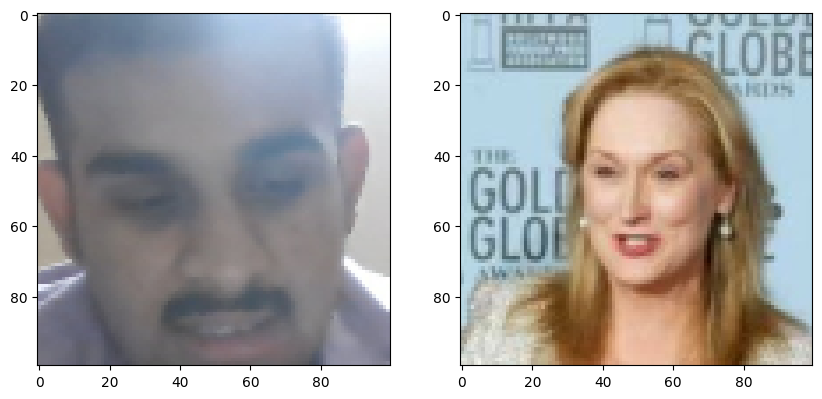

In [77]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[6])

# Renders cleanly
plt.show()


In [62]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [63]:
import h5py

In [64]:
#model_path = 'model.h5py/'

In [65]:
loaded_model=tf.saved_model.load("model.h5py")

In [66]:
#os.mkdir("Verification")

In [78]:
os.listdir(os.path.join('Verification','Verification image'))

['0a113ef3-1e73-11ee-ac6b-30c9abdaff74.jpg',
 '0a60318e-1e73-11ee-b350-30c9abdaff74.jpg',
 '0ab7baf6-1e73-11ee-9b65-30c9abdaff74.jpg',
 '0aee6273-1e73-11ee-9f74-30c9abdaff74.jpg',
 '0b3a6feb-1e73-11ee-bbb2-30c9abdaff74.jpg',
 '0b573133-1e73-11ee-9d7f-30c9abdaff74.jpg',
 '0b9062ad-1e73-11ee-a84b-30c9abdaff74.jpg',
 '0bc92652-1e73-11ee-a020-30c9abdaff74.jpg',
 '0be5aecc-1e73-11ee-ae91-30c9abdaff74.jpg',
 '0c23996f-1e73-11ee-8e9d-30c9abdaff74.jpg',
 '0c61df1a-1e73-11ee-8f1b-30c9abdaff74.jpg',
 '0c7e4cac-1e73-11ee-9ddf-30c9abdaff74.jpg',
 '0c9fad60-1e73-11ee-8bc8-30c9abdaff74.jpg',
 '0d1a229f-1e73-11ee-ad61-30c9abdaff74.jpg',
 '0d51969d-1e73-11ee-9530-30c9abdaff74.jpg',
 '0d6e43cc-1e73-11ee-a244-30c9abdaff74.jpg',
 '0d8d14e9-1e73-11ee-aa3d-30c9abdaff74.jpg',
 '0da9cb9e-1e73-11ee-ba16-30c9abdaff74.jpg',
 '0dc8c198-1e73-11ee-a859-30c9abdaff74.jpg',
 '0e063bf7-1e73-11ee-8c77-30c9abdaff74.jpg',
 '0e604299-1e73-11ee-9d61-30c9abdaff74.jpg',
 '0e9bc45c-1e73-11ee-821a-30c9abdaff74.jpg',
 '0ef64f2c

In [79]:
os.path.join('Verification','Input image')

'Verification\\Input image'

In [80]:
def verify(model,detection_threshold,verification_threshold):
    results=[]
    for image in os.listdir(os.path.join('Verification','Verification image')):
        imp_img=preprocess(os.path.join('Verification','Input image','input_image.jpg'))
        validation_img=preprocess(os.path.join('Verification','Verification image',image))

    #make prediction
        results=model.predict(list(np.expand_dims([input_img,validation_img],axis=-1)))
        results.append(results)

    detection=np.sum(np.array(results)>detection_threshold)
    verification=detection/len(os.listdir(os.path.join('Verification','Verificationimage')))
    verified=verification>verification_threshold

    return results,verified


In [ ]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    
    ret,frame=cap.read()
    frame=frame[130:80+300,200:200+250,:]
    cv2.imshow('Verification',frame)
    cv2.imwrite(os.path.join('Verification','Input image','input_img.jpg'),frame)
    results,verified=verify(loaded_model,0.5,0.5)
    print(verified)
    if cv2.waitKey(10)& 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()